## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as smf
import statsmodels.formula.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
df_salary=pd.read_csv('Salary_Data.csv')

In [5]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Understanding

### Initial Analysis

In [6]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Checking for Null Value

In [8]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Checking for Duplicated Value

In [9]:
df_salary[df_salary.duplicated()].shape

(0, 2)

In [10]:
df_salary[df_salary.duplicated()]

,YearsExperience,Salary


## Plotting data to check outliers

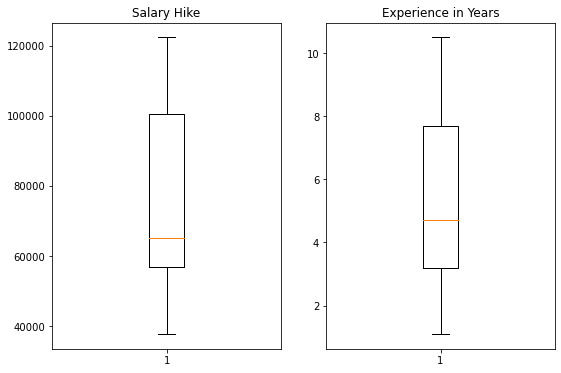

In [11]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(df_salary.Salary)
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df_salary.YearsExperience)
plt.title('Experience in Years')
plt.show()

### There are no outliers in the data

## Assumption Check

### Collinearity check

In [12]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


[]

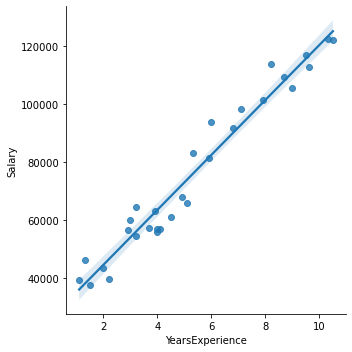

In [13]:
sns.lmplot(x='YearsExperience',y='Salary',data=df_salary)
plt.plot()

 - There is good correlation between the two variable.
 - The score is more than 0.8 which is a good sign.

## Checking for Homosedacity

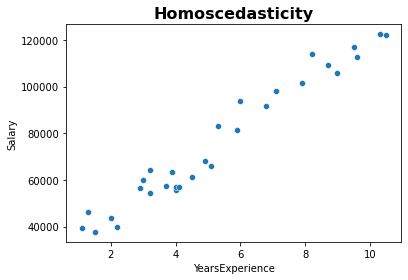

In [14]:
sns.scatterplot(x=df_salary.YearsExperience,y=df_salary.Salary)
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

 - The above graph shows the Salary increases with Experience in a constant manner
 - It follows Homoscedasticity

In [15]:
df_salary.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

## Normality Check

<AxesSubplot:xlabel='Salary', ylabel='Density'>

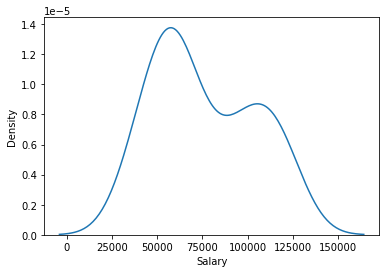

In [16]:
sns.distplot(df_salary.Salary,hist=False,kde=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

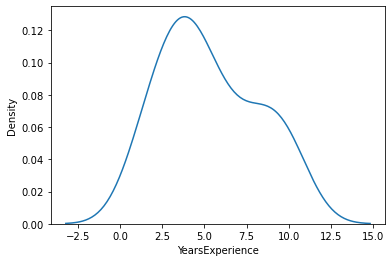

In [17]:
sns.distplot(df_salary.YearsExperience,hist=False,kde=True)

In [18]:
df_salary.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

- Skew within 0.5 is negligible
- We can consider both salary and year of experience as Normally distributed

## Model Building

In [19]:
x=df_salary['YearsExperience']
y=df_salary['Salary']

In [20]:
linear_model = sm.ols(formula='y~x',data=df_salary).fit()

In [21]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        07:19:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

In [22]:
y_prediction=linear_model.predict(df_salary)

In [54]:
from sklearn.metrics import mean_squared_error,r2_score
model_mse=mean_squared_error(y,y_prediction)
print('mean squared error is ',mean_squared_error(y,y_prediction))
print('r2 score is ',r2_score(y,y_prediction))
model_mse

mean squared error is  31270951.72228097
r2 score is  0.9569566641435086


31270951.72228097

## Log Transformation on Data

In [38]:
log_x = np.log(df_salary[['YearsExperience']])

In [39]:
frames = [log_x,y]
log_model = pd.concat(frames,axis=1)
log_model

,YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0
5,1.064711,56642.0
6,1.098612,60150.0
7,1.163151,54445.0
8,1.163151,64445.0
9,1.308333,57189.0


In [42]:
Linear_model_1 = sm.ols(formula='y~log_x',data=log_model).fit()
Linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        07:42:50   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
y_pred_1 = Linear_model_1.predict(log_x)

In [44]:
y_pred_1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [57]:
Log_model_mse=mean_squared_error(y,y_pred_1)
print('mean squared error is ',mean_squared_error(y,y_pred_1))
print('r2 score is ',r2_score(y,y_pred_1))
Log_model_mse

mean squared error is  106149618.72183888
r2 score is  0.8538888828756968


106149618.72183888

## Square root Transformation on data

In [48]:
sqrt_x = np.sqrt(df_salary[['YearsExperience']])

In [49]:
frames = [sqrt_x,y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


In [51]:
Linear_model_2 = sm.ols(formula='y~sqrt_x',data=sqrt_model).fit()
Linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.57e-18
Time:                        07:47:34   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
y_pred_2 = Linear_model_2.predict(sqrt_x)

In [58]:
sqrt_model_mse=mean_squared_error(y,y_pred_2)
print('mean squared error is ',mean_squared_error(y,y_pred_2))
print('r2 score is ',r2_score(y,y_pred_2))
sqrt_model_mse

mean squared error is  50127755.61652503
r2 score is  0.9310009544993526


50127755.61652503

## Model Evaluation

In [63]:
print('linear_model MSE is',np.sqrt(model_mse))
print('Linear_model_2 MSE is',np.sqrt(sqrt_model_mse))
print('Linear_model_1 MSE is',np.sqrt(Log_model_mse))

linear_model MSE is 5592.043608760662
Linear_model_2 MSE is 7080.09573498304
Linear_model_1 MSE is 10302.893706228308


### _The one with minimum residual error is the best model_
### _linear model have the minimum MSE compared to other models_

## Residual Plot to check Homoscedasticity or Hetroscedasticity

In [59]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

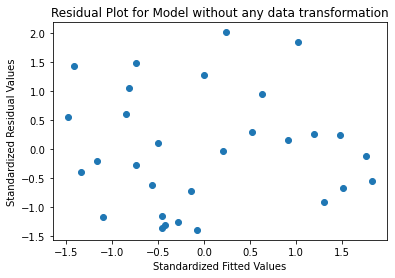

In [62]:
plt.scatter(get_standardized_values(linear_model.fittedvalues), get_standardized_values(linear_model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

- The Model have Homoscedasciticity.
- The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
- Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

##  Model prediction

In [75]:
prediction = pd.DataFrame()
prediction['YearsExperience'] = df_salary.YearsExperience
prediction['Salary'] = df_salary.Salary
prediction['Predicted_Salary_Hike'] = pd.DataFrame(linear_model.predict(df_salary))
prediction

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
